In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.nn import Linear
import numpy as np

Text(0.5, 0, 'x')

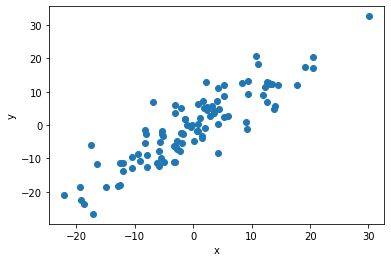

In [2]:
#create our dataset
dataX = torch.randn(100,1)*10
dataY = dataX + torch.randn(100,1)*5
plt.plot(dataX.numpy(), dataY.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
torch.manual_seed(1)

In [4]:
#create a simple linear model
model = Linear(in_features=1, out_features=1) # for one single output, there is one single input

In [5]:
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [6]:
x=torch.tensor([[2.0],[4.5]])
model(x)

tensor([[0.5891],
        [1.8773]], grad_fn=<AddmmBackward>)

In [7]:
class LR(nn.Module):
    def __init__(self,  input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self,x):
        return self.linear(x)

In [8]:
torch.manual_seed(1) # need to set up the seed again here to see consistent results as above
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [9]:
x=torch.tensor([2.0])
model.forward(x)

tensor([0.5891], grad_fn=<AddBackward0>)

In [10]:
def plot_fit(title, model):
    
    [w,b] = model.parameters()
    w1 = w[0][0].item()
    b1 = b[0].item()
    print("model parameters are: w1 " + str(w1) + " b1: " + str(b1))
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1
    plt.plot(x1,y1, 'r')
    plt.scatter(dataX,dataY)
    plt.title(title)
    plt.show()

model parameters are: w1 0.5152631998062134 b1: -0.44137823581695557


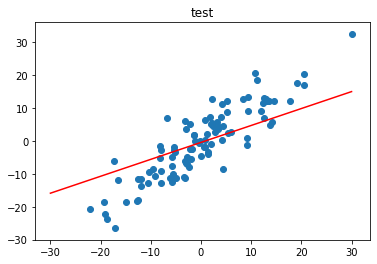

In [11]:
plot_fit("test", model)
#as we can see this does not fit well

Gradien descent

In [12]:
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 

In [13]:
epochs = 50
losses=[]
for i in range(epochs):
    y_pred = model.forward(dataX)
    loss = loss_func(y_pred,dataY)
    if i%5 == 0:
        print('epoch: ',i, "loss: ", loss.item())
    losses.append(loss)
    optimizer.zero_grad() #need to set gradient to zero since PyTorch accumulates the gradients on subsequent backward passes
    loss.backward()
    optimizer.step()

epoch:  0 loss:  44.764095306396484
epoch:  5 loss:  35.10399627685547
epoch:  10 loss:  30.040300369262695
epoch:  15 loss:  27.38593101501465
epoch:  20 loss:  25.994524002075195
epoch:  25 loss:  25.265138626098633
epoch:  30 loss:  24.882776260375977
epoch:  35 loss:  24.682323455810547
epoch:  40 loss:  24.577226638793945
epoch:  45 loss:  24.52212142944336


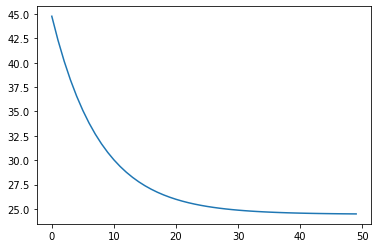

In [14]:
plt.plot(range(epochs), losses)

model parameters are: w1 0.9549401998519897 b1: -0.41853320598602295


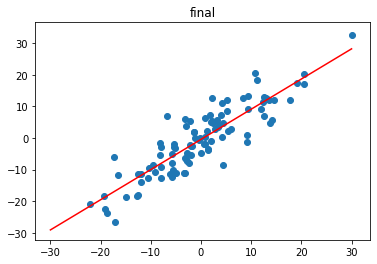

In [15]:
plot_fit("final", model)
#now the line fits much better